In [15]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [16]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [17]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 50
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.STATIC_FACTOR_MODEL.value(
    factor_cov_estimator=CovEstimators.HISTORICAL.value(),
    residual_cov_estimator=CovEstimators.QIS.value(),
)

In [18]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [19]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [10:19<00:00,  2.19s/it]


StrategyStatistics:
* final_nav = 9.727970
* geom_avg_total_r = 0.127109
* geom_avg_xs_r = 0.119331
* std_xs_r = 0.146855
* min_xs_r = -0.092775
* max_xs_r = 0.099274
* skew = -0.035075
* kurtosis = 15.769649
* max_dd = -0.275560
* sharpe = 0.812573
* alpha_buy_hold = 0.049538
* tracking_error_buy_hold = 0.170001
* ir_buy_hold = 0.291398
* factor_loadings = {'low_risk': 0.605452021583655, 'momentum': -0.0963853344903178, 'quality': 0.07394962582339201, 'size': 0.04607044278619217, 'value': -0.261953893697849, 'spx': 0.6572395029218592}
* alpha_benchmark = 0.059291
* alpha_benchmark_pvalue = 0.012096
* tracking_error_benchmark = 0.102654
* ir_benchmark = 0.577578
* ttest_pval = 0.292982
* levene_pval = 0.000000
* timing_ability_coef = -0.037321
* timing_ability_pval = 0.044044

In [20]:
result.std_xs_r, result.sharpe

(0.1468554706706864, 0.8125732837114121)

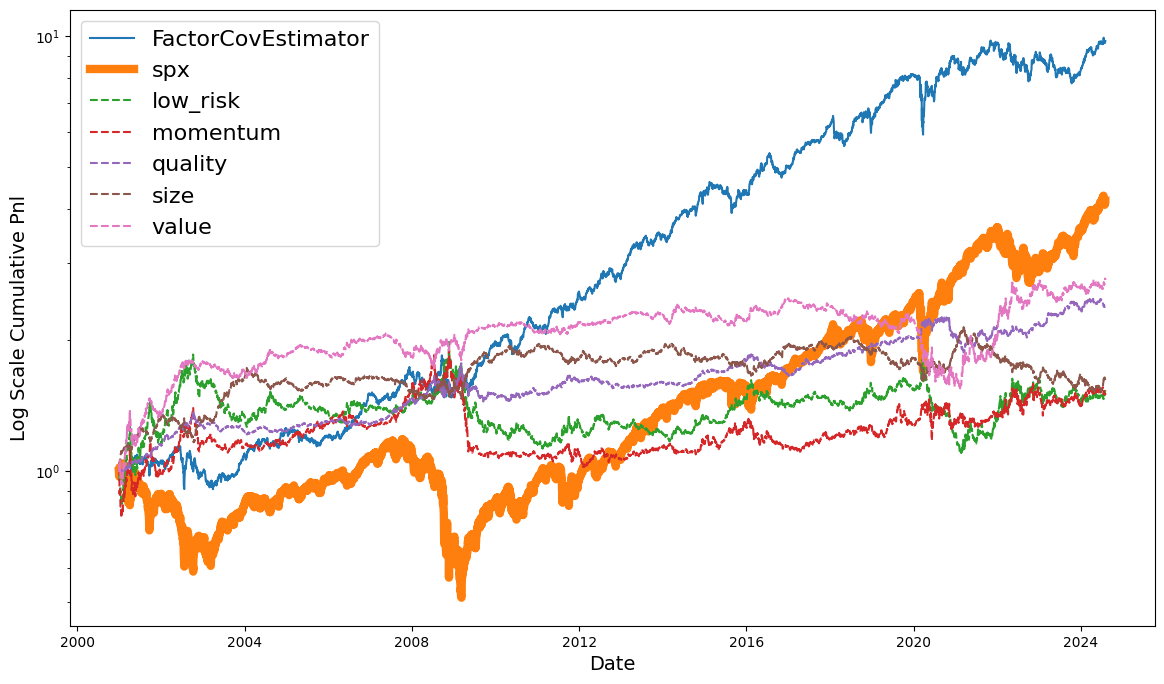

In [21]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

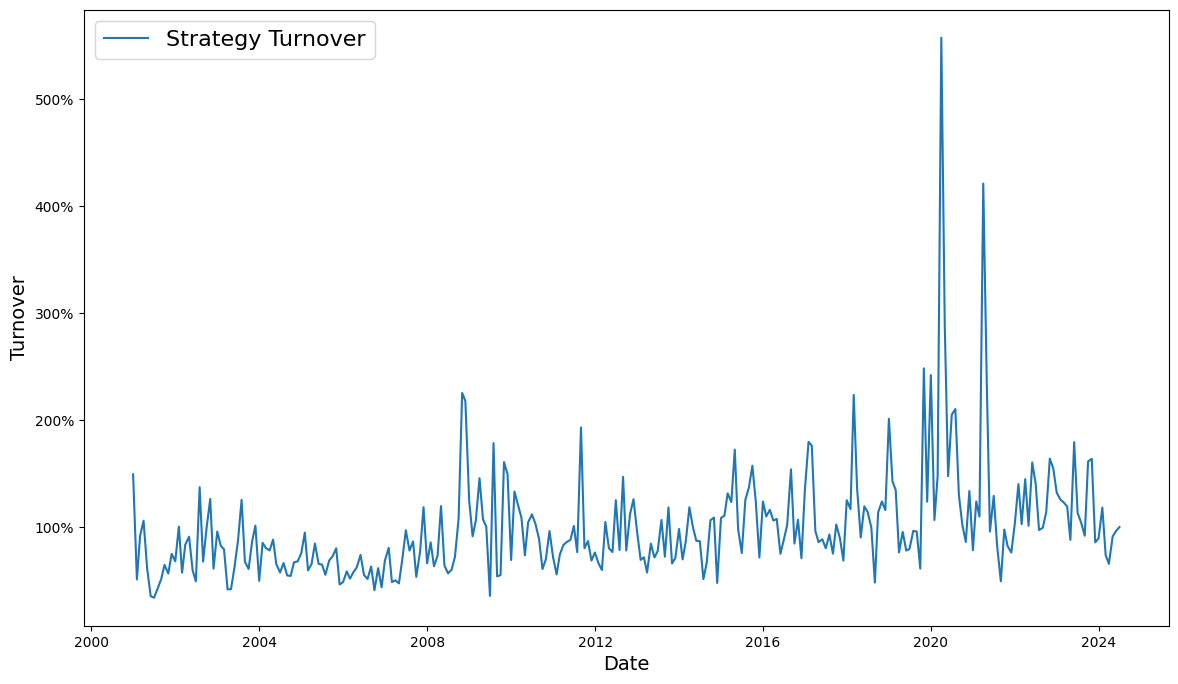

In [22]:
runner.plot_turnover()

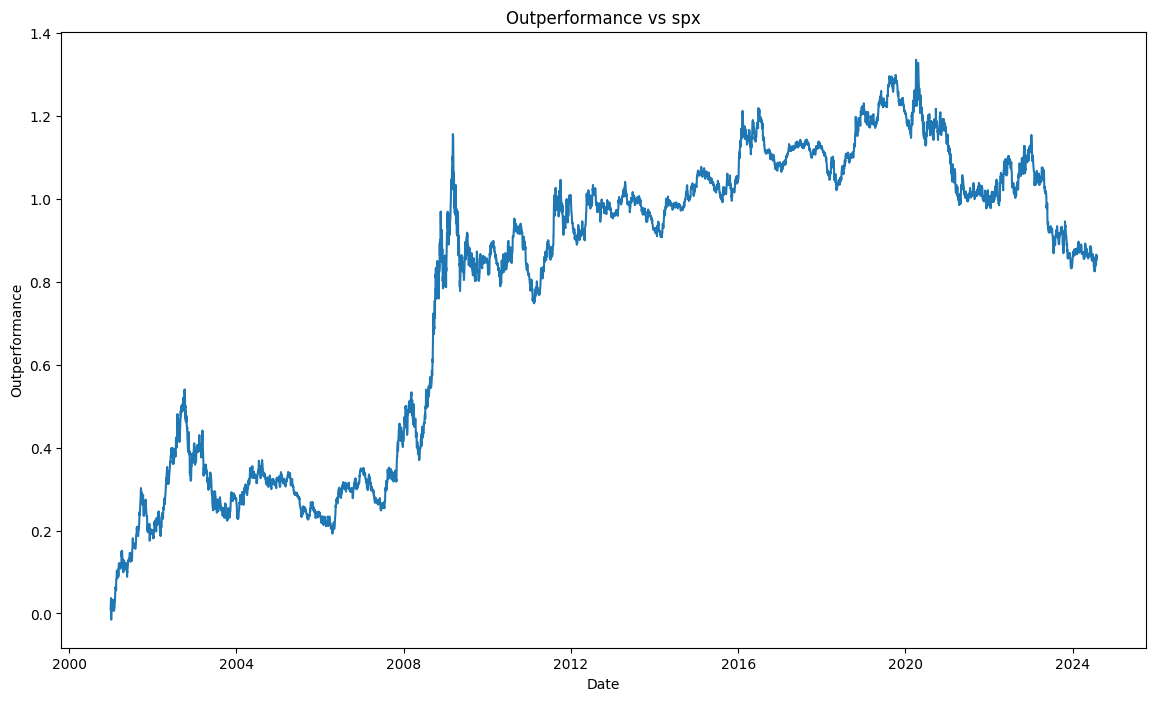

In [23]:
runner.plot_outperformance(mkt_only=True)

In [24]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")